# Homework : 2 Machine Learning - 1 (Supervised Methods)

## 2. C-class nearest-means classifier (NMC), for C classes and D features.

### Importing Necessary Libraries

In [1]:
#Importing Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Importing the nearestMeansClassifier library from utils package.
from utils import nearestMeansClassifier

#Importing the plotGraph library to plot CER vs m
from utils import plotGraph as pg

### Loading the Training Data and Testing Data from HW2_Datasets using Pandas

In [2]:
#train_data is the pandas dataframe holding the training data.
train_data = pd.read_csv("./HW2_Datasets/HW2_train_set.csv")
print("Train Data: ")
print(train_data.head())
print()

#test_data is the pandas dataframe holding the test data.
test_data = pd.read_csv("./HW2_Datasets/HW2_test_set.csv")
print("Test Data: ")
print(test_data.head())

Train Data: 
         X1        X2        X3        X4        X5        X6        X7  Class
0  3.331309  0.199388  0.511930  3.546394  3.501046 -0.988523  1.424119      4
1  4.923320  1.714349 -1.733554  3.908366  1.779802 -0.928249  0.307568      0
2  3.480943  0.472072 -1.566615  4.244122  0.010020 -2.899989  0.706875      0
3  1.297407  2.025849  5.609849  1.759304  3.795999  4.919387  0.545626      2
4  4.540691 -1.005979 -3.846193  4.729157  2.783594 -1.138115  0.467317      0

Test Data: 
         X1        X2        X3        X4        X5        X6        X7  Class
0  0.461124  0.088944  1.912568  0.419696 -0.228390 -1.840807  1.634009      4
1  1.853865  6.754218  3.936953  4.412639  2.596076 -4.091204  5.054838      3
2  6.290771  2.560742  0.338448  4.649877  2.621144 -0.462739 -2.035173      0
3  4.253980  1.126030 -1.857628  4.088797  3.687401 -2.316638 -1.810089      0
4  0.280335  3.315180  5.771898  1.051240  1.938454  4.384316  2.662093      2


## (a) Run it on the given dataset. There are C = 5 classes and D = 7 features.

### Instantiating objects for <strong> <em> NearestMeansClassifier() class </strong> </em> one for <strong> <em> train_data </strong> </em>.

In [3]:
nmc_1 = nearestMeansClassifier.NearestMeansClassifier()

### (a) i] Performing Classification using nmc_1 on the train_data with all 7 features

In [4]:
X_train, n_train, T_train = nmc_1.generateData(data=train_data)

class_means = nmc_1.calculateClassMeans(X=X_train)
print("---------------------------------------------------")
print(f"  Shape of sample_means: {class_means.shape}")
print(f"  Sample Means: ")
print(class_means)
print("---------------------------------------------------")

---------------------------------------------------
  Shape of Input Data: (1050, 8)
  Number of Data Points: 1050
  Number of Input Features: 7
  Number of Target Classes: 5
---------------------------------------------------
---------------------------------------------------
  Shape of sample_means: (5, 7)
  Sample Means: 
[[ 4.28147871  1.20108426 -1.37040891  4.63625254  1.68940366 -1.34148042
  -0.48377135]
 [ 3.22972494  1.07643941  2.07045979  2.55846495 -1.65234996  1.60513881
  -1.5393723 ]
 [ 0.7851701   2.7408094   5.01696957  1.00526839  1.55731721  4.36506082
   0.19203977]
 [ 4.14645713  4.27985188  3.28154766  4.44752838 -0.03318571 -0.52154097
   3.26751149]
 [ 2.76907036  1.76295742 -0.67844556  2.8697092   0.57576989 -0.45225762
   1.24928872]]
---------------------------------------------------


### (a) i] Report the classification accuracy on the training set.

In [5]:
Y_hat_train = nmc_1.classify(X=X_train, sample_means=class_means)

CER_train = nmc_1.calculateCER(T=T_train, Y_hat=Y_hat_train, trainTestFlag="train", percentageFlag=True)

accuracy_train = nmc_1.calculateAccuracy(T=T_train, Y_hat=Y_hat_train, trainTestFlag="train", percentageFlag=True)

print(f"Accuracy for the Training set is: {accuracy_train}%")
print(f"Classification Error Rate for the Training Set is: {CER_train}%")


Accuracy for the Training set is: 85.23809523809524%
Classification Error Rate for the Training Set is: 14.761904761904763%


### (a) ii] Performing Classification using nmc_1 on the test_data with all 7 features

In [6]:
X_test, n_test, T_test = nmc_1.transformTestData(test_data=test_data)
print(T_test.shape)
print(X_test.shape)

(450,)
(450, 7)


### (a) ii] Report the classification accuracy on the test set.

In [7]:
Y_hat_test = nmc_1.classify(X=X_test, sample_means=class_means)

CER_test = nmc_1.calculateCER(T=T_test, Y_hat=Y_hat_test, trainTestFlag="test", percentageFlag=True)

accuracy_test = nmc_1.calculateAccuracy(T=T_test, Y_hat=Y_hat_test, trainTestFlag="test", percentageFlag=True)

print(f"Accuracy for the Test set is: {accuracy_test}%")
print(f"Classification Error Rate for the Test Set is: {CER_test}%")


Accuracy for the Test set is: 82.44444444444444%
Classification Error Rate for the Test Set is: 17.555555555555554%


## (b) For visualization, run it again using only the following 2 features: X1 and X2. 

### (b) i] Performing Classification using nmc_2features on Training data with only 2 features, X1 and X2.

In [8]:
nmc_2features = nearestMeansClassifier.NearestMeansClassifier()
feature1 = 1
feature2 = 2

In [9]:
X_train, n_train, T_train = nmc_2features.generateData(data=train_data)

X_train_2features_1 = nmc_2features.generateDataWith2Features(feature1=feature1, feature2=feature2, X=X_train, n=n_train, printFlag=True)

class_means_2features_1 = nmc_2features.calculateClassMeans(X=X_train_2features_1, redFlag=True)
print("---------------------------------------------------")
print(f"  Shape of sample_means: {class_means_2features_1.shape}")
print(f"  Sample Means: ")
print(class_means_2features_1)
print("---------------------------------------------------")

Y_hat_train_2features_1 = nmc_2features.classify(X=X_train_2features_1, sample_means=class_means_2features_1)

---------------------------------------------------
  Shape of Input Data: (1050, 8)
  Number of Data Points: 1050
  Number of Input Features: 7
  Number of Target Classes: 5
---------------------------------------------------
---------------------------------------------------
  After retaining only 2 features [1 and 2]: 
  Shape of X_2_features: (1050, 2)
  Number of Data Points: 1050
  Number of Input Features: 2
  Number of Target Classes: 5
---------------------------------------------------
---------------------------------------------------
  Shape of sample_means: (5, 2)
  Sample Means: 
[[4.28147871 1.20108426]
 [3.22972494 1.07643941]
 [0.7851701  2.7408094 ]
 [4.14645713 4.27985188]
 [2.76907036 1.76295742]]
---------------------------------------------------


### b] ii] Plotting Decision Boundaries for the X_train_2features_1 (X1 and X2) in 2D Space.

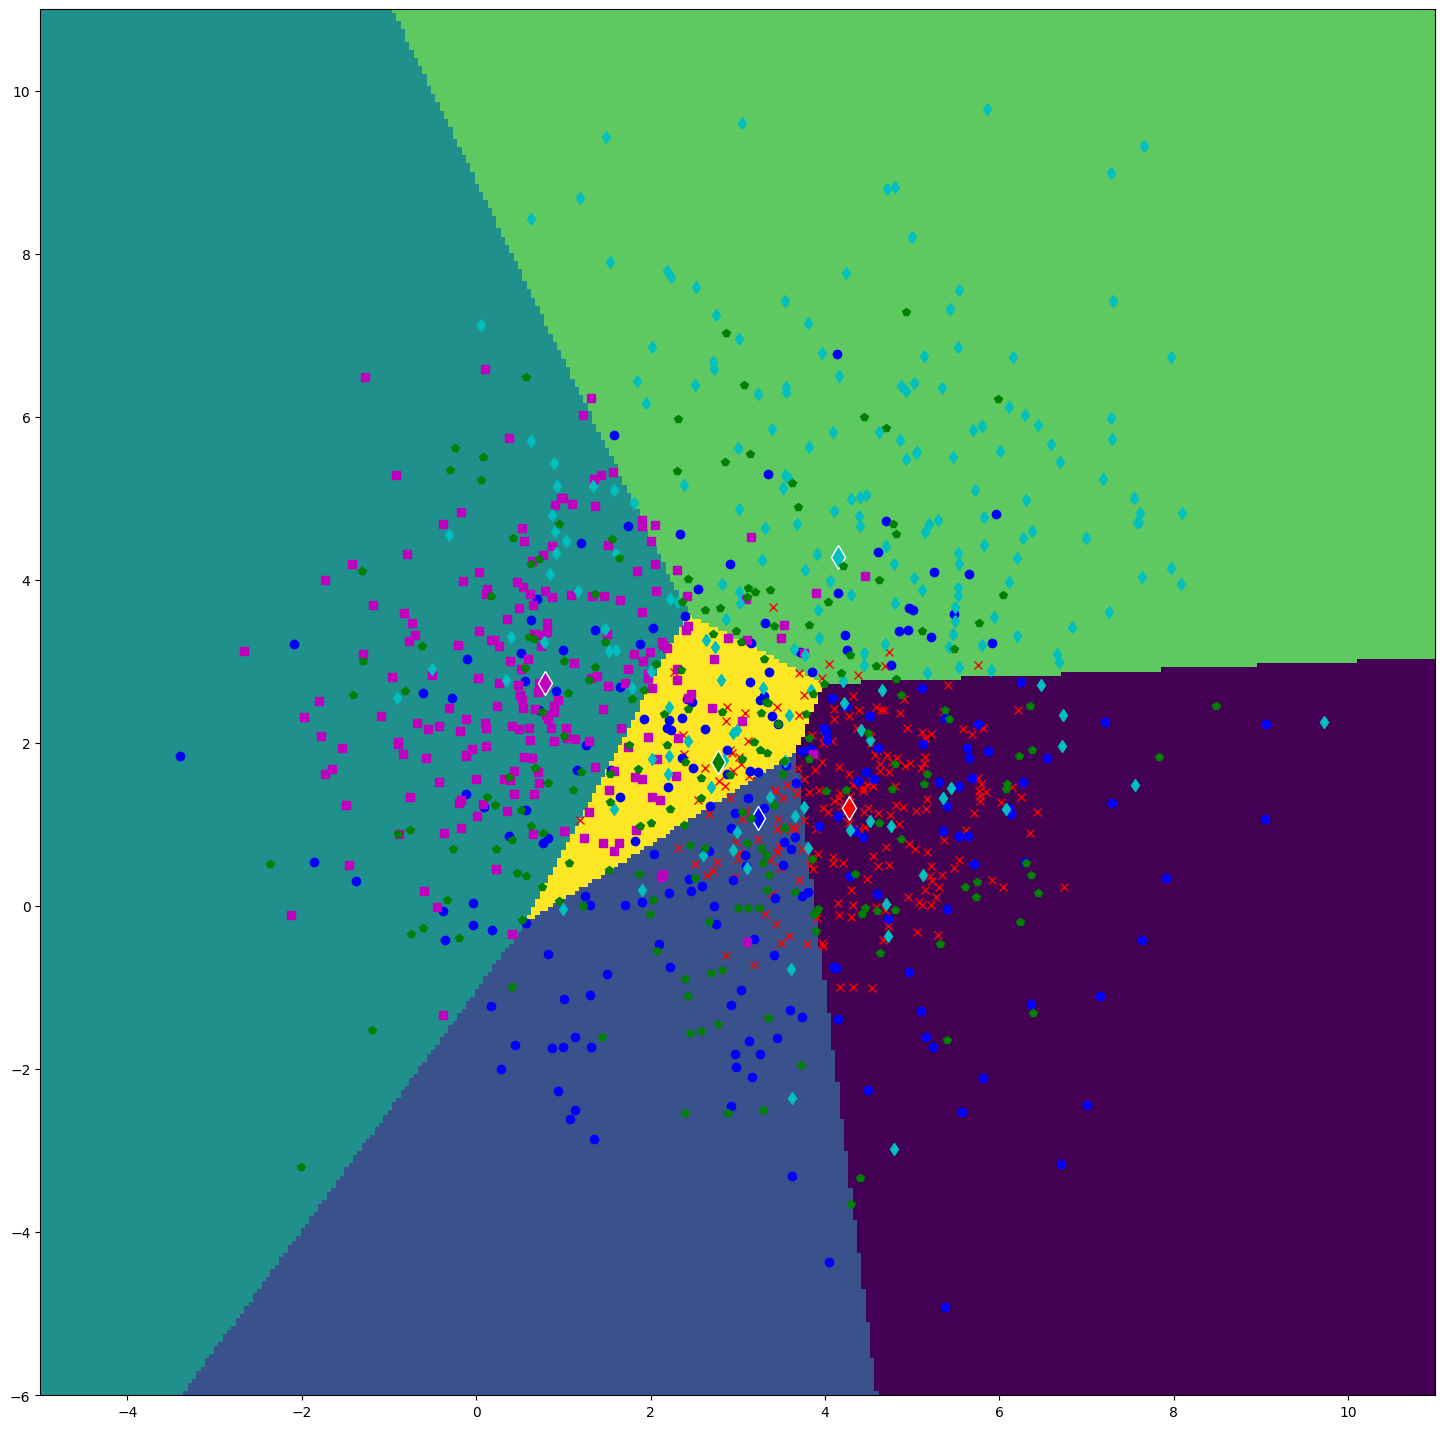

In [10]:
nmc_2features.plotDecisionBoundaries_2(training=X_train_2features_1, label_train=T_train, sample_mean=class_means_2features_1, fsize=(18,18))

### (b) iii] Report the classification accuracy on the Training set using only the 2 features.

In [11]:
CER_train_2features_1 = nmc_2features.calculateCER(T=T_train, Y_hat=Y_hat_train_2features_1, trainTestFlag="train", percentageFlag=True)

accuracy_train_2features_1 = nmc_2features.calculateAccuracy(T=T_train, Y_hat=Y_hat_train_2features_1, trainTestFlag="train", percentageFlag=True)


print(f"Accuracy for the Training set with only feature - {feature1} and feature - {feature2} is: {accuracy_train_2features_1}%")
print(f"Classification Error Rate for the Training set with only feature - {feature1} and feature - {feature2} is: {CER_train_2features_1}%")


Accuracy for the Training set with only feature - 1 and feature - 2 is: 50.857142857142854%
Classification Error Rate for the Training set with only feature - 1 and feature - 2 is: 49.142857142857146%


### (b) iv] Performing Classification using nmc_2features on Test data with only 2 features, X1 and X2.

In [12]:
X_test, n_test, T_test = nmc_2features.transformTestData(test_data=test_data)

X_test_2features_1 = nmc_2features.generateDataWith2Features(feature1=feature1, feature2=feature2, X=X_test, n=n_test, printFlag=True)

Y_hat_test_2features_1 = nmc_2features.classify(X=X_test_2features_1, sample_means=class_means_2features_1)

---------------------------------------------------
  After retaining only 2 features [1 and 2]: 
  Shape of X_2_features: (450, 2)
  Number of Data Points: 450
  Number of Input Features: 2
  Number of Target Classes: 5
---------------------------------------------------


### b] v] Plotting Decision Boundaries for the X_test_2features_1 (X1 and X2) in 2D Space.

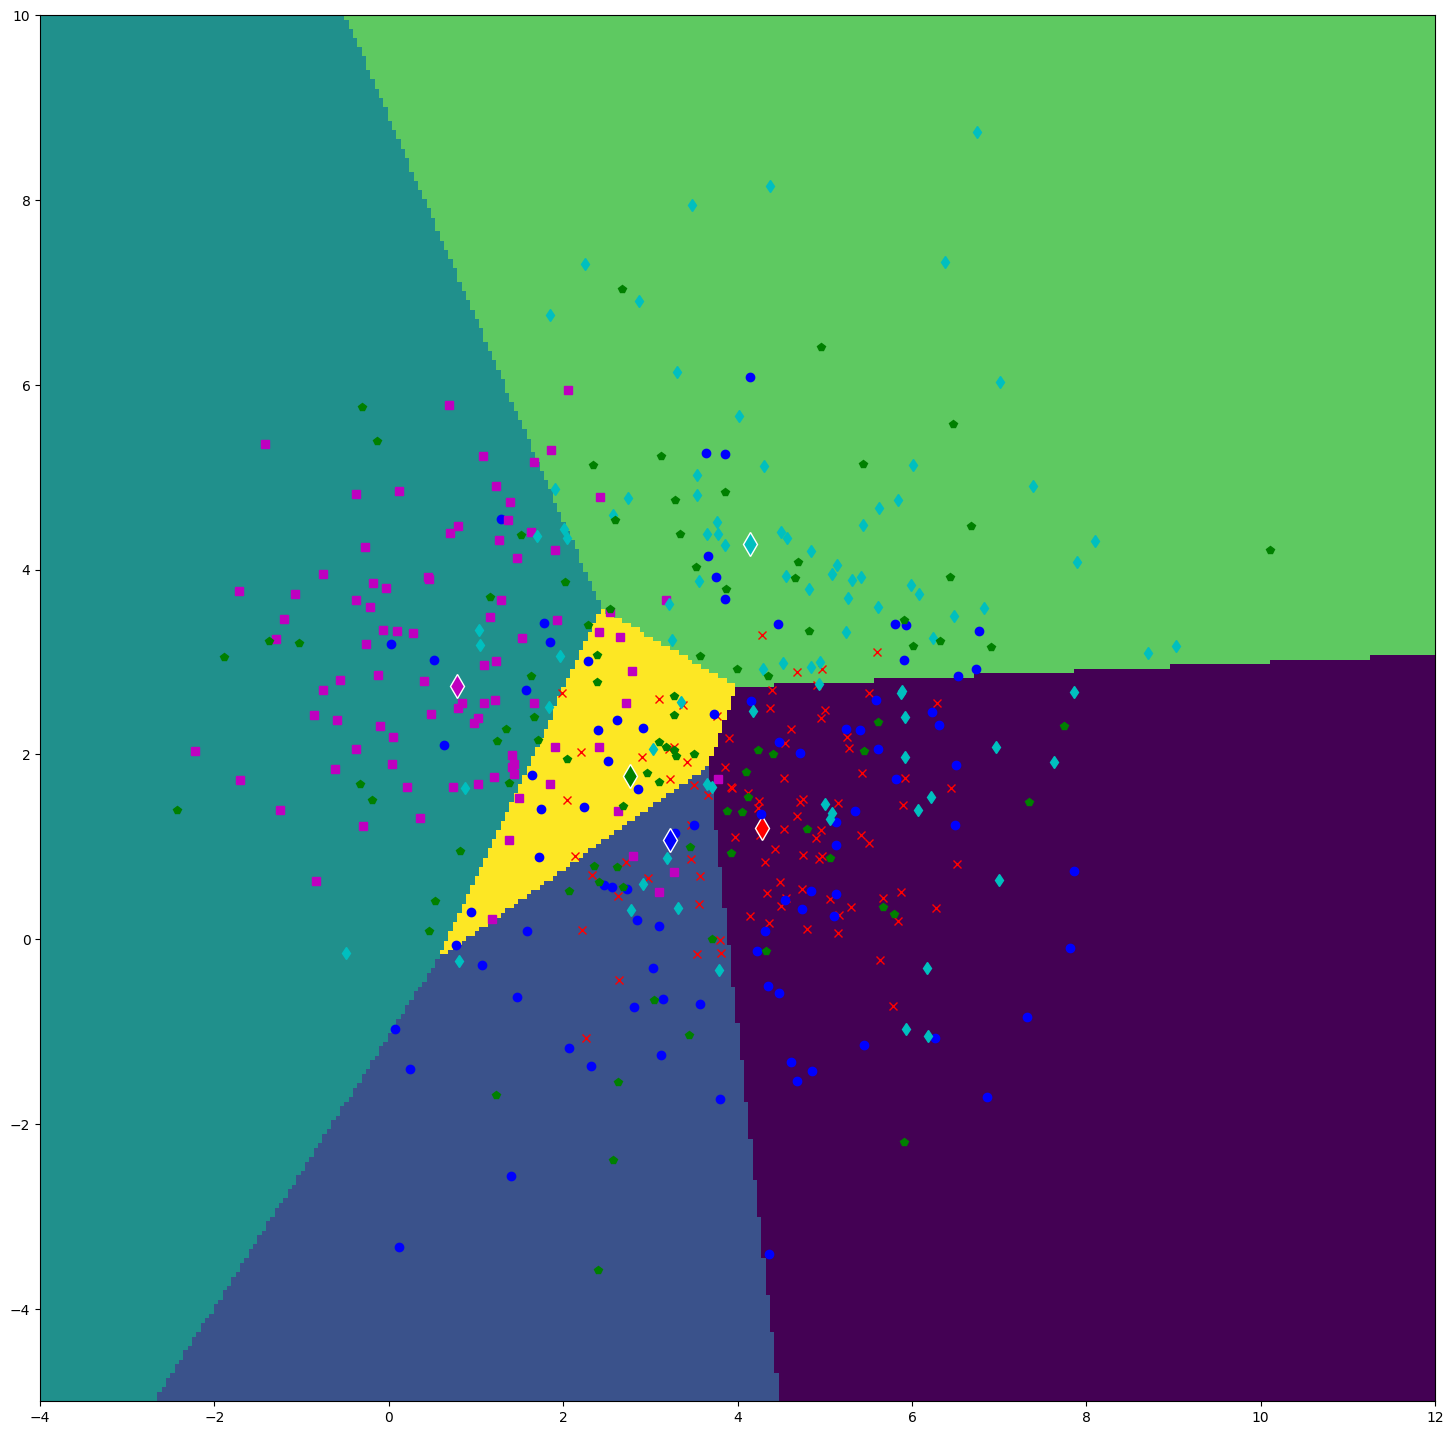

In [13]:
nmc_2features.plotDecisionBoundaries_2(training=X_test_2features_1, label_train=T_test, sample_mean=class_means_2features_1, fsize=(18,18))

### (b) vi] Report the classification accuracy on the Test set using only the 2 features.

In [14]:
CER_test_2features_1 = nmc_2features.calculateCER(T=T_test, Y_hat=Y_hat_test_2features_1, trainTestFlag="test", percentageFlag=True)

accuracy_test_2features_1 = nmc_2features.calculateAccuracy(T=T_test, Y_hat=Y_hat_test_2features_1, trainTestFlag="test", percentageFlag=True)


print(f"Accuracy for the Test set with only feature - {feature1} and feature - {feature2} is: {accuracy_test_2features_1}%")
print(f"Classification Error Rate for the Test set with only feature - {feature1} and feature - {feature2} is: {CER_test_2features_1}%")


Accuracy for the Test set with only feature - 1 and feature - 2 is: 48.0%
Classification Error Rate for the Test set with only feature - 1 and feature - 2 is: 52.0%


## (c) Repeat (b) using only the following features: X3 and X4.

### (c) i] Performing Classification using nmc_2features on Training data with only 2 features, X3 and X4.

In [15]:
nmc_2features = nearestMeansClassifier.NearestMeansClassifier()
feature1 = 3
feature2 = 4

In [16]:
X_train, n_train, T_train = nmc_2features.generateData(data=train_data)

X_train_2features_2 = nmc_2features.generateDataWith2Features(feature1=feature1, feature2=feature2, X=X_train, n=n_train, printFlag=True)

class_means_2features_2 = nmc_2features.calculateClassMeans(X=X_train_2features_2, redFlag=True)
print("---------------------------------------------------")
print(f"  Shape of sample_means: {class_means_2features_2.shape}")
print(f"  Sample Means: ")
print(class_means_2features_2)
print("---------------------------------------------------")

Y_hat_train_2features_2 = nmc_2features.classify(X=X_train_2features_2, sample_means=class_means_2features_2)

---------------------------------------------------
  Shape of Input Data: (1050, 8)
  Number of Data Points: 1050
  Number of Input Features: 7
  Number of Target Classes: 5
---------------------------------------------------
---------------------------------------------------
  After retaining only 2 features [3 and 4]: 
  Shape of X_2_features: (1050, 2)
  Number of Data Points: 1050
  Number of Input Features: 2
  Number of Target Classes: 5
---------------------------------------------------
---------------------------------------------------
  Shape of sample_means: (5, 2)
  Sample Means: 
[[-1.37040891  4.63625254]
 [ 2.07045979  2.55846495]
 [ 5.01696957  1.00526839]
 [ 3.28154766  4.44752838]
 [-0.67844556  2.8697092 ]]
---------------------------------------------------


### (c) ii] Plotting Decision Boundaries for the X_train_2features_2 (X3 and X4) in 2D Space.

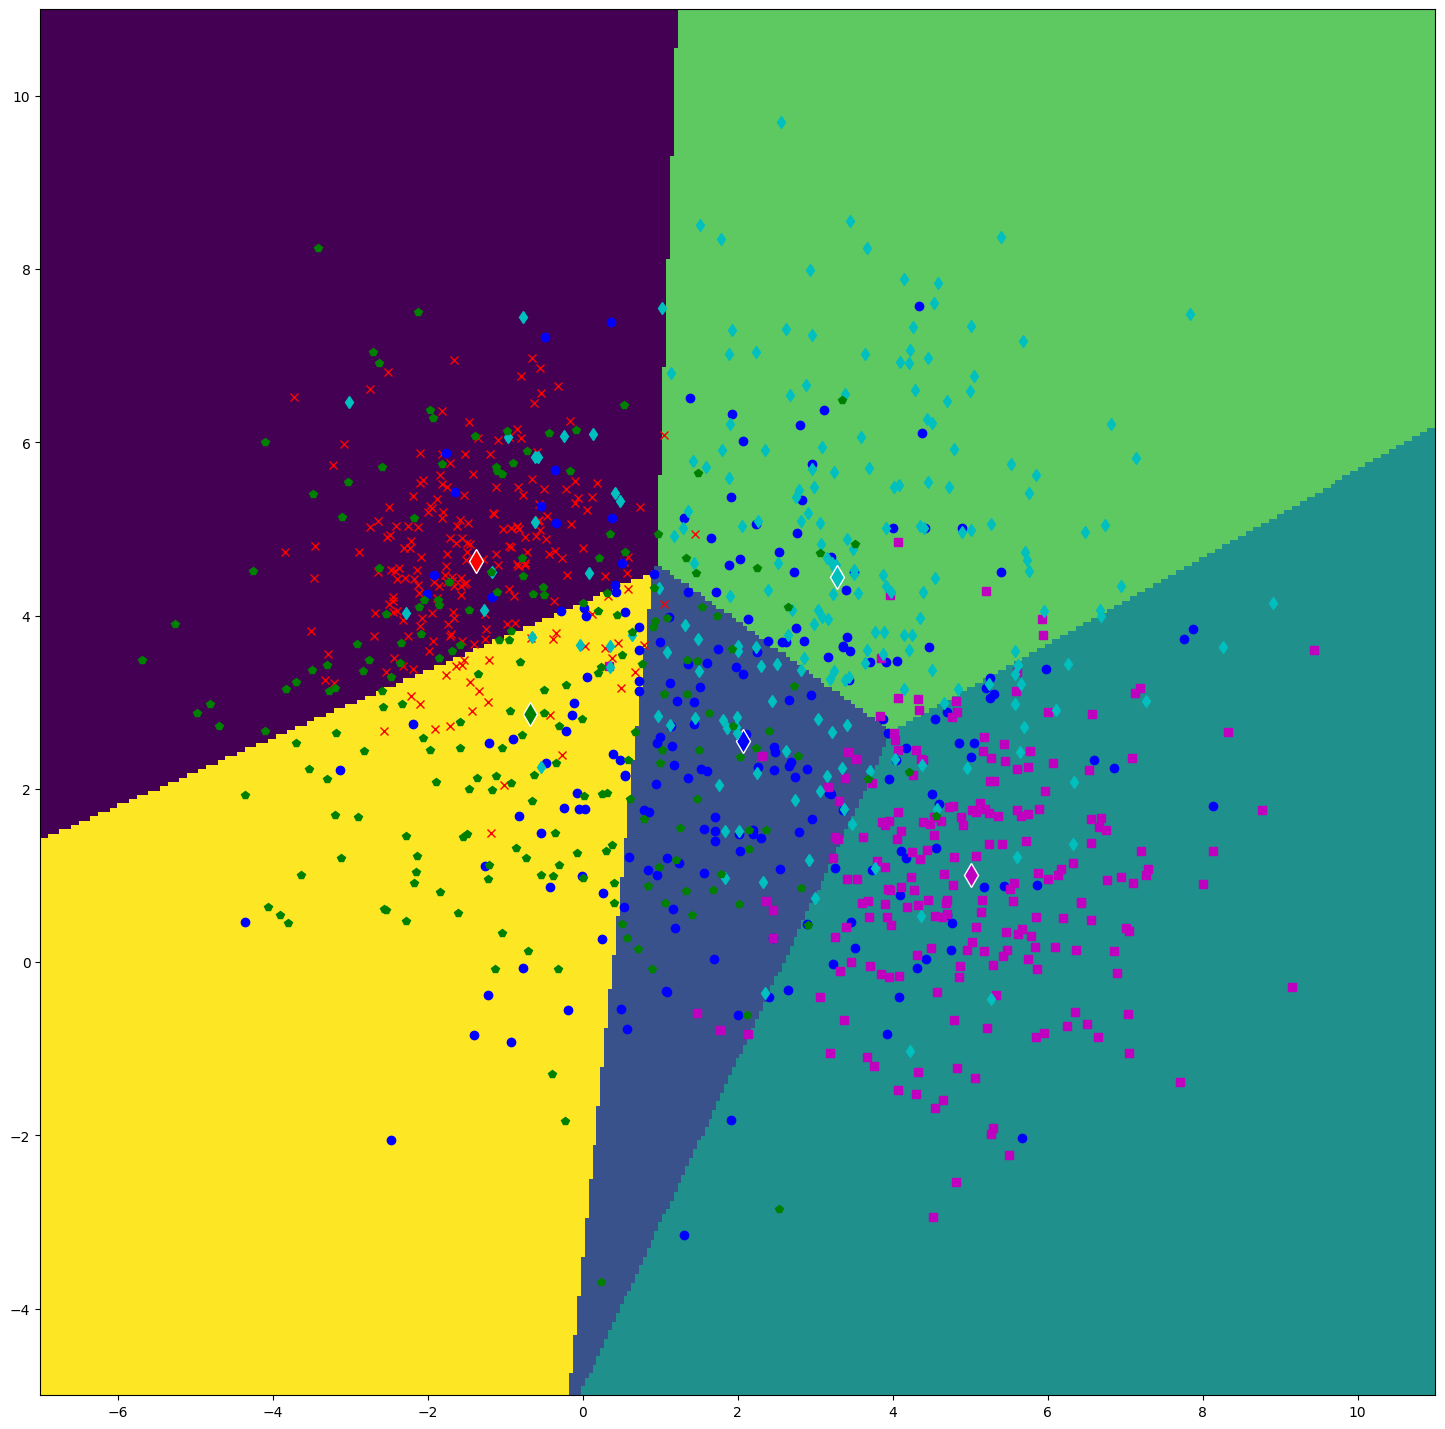

In [17]:
nmc_2features.plotDecisionBoundaries_2(training=X_train_2features_2, label_train=T_train, sample_mean=class_means_2features_2, fsize=(18,18))

### (c) iii] Report the classification accuracy on the Training set using only the 2 features X3 and X4.

In [18]:
CER_train_2features_2 = nmc_2features.calculateCER(T=T_train, Y_hat=Y_hat_train_2features_2, trainTestFlag="train", percentageFlag=True)

accuracy_train_2features_2 = nmc_2features.calculateAccuracy(T=T_train, Y_hat=Y_hat_train_2features_2, trainTestFlag="train", percentageFlag=True)


print(f"Accuracy for the Training set with only feature - {feature1} and feature - {feature2} is: {accuracy_train_2features_2}%")
print(f"Classification Error Rate for the Training set with only feature - {feature1} and feature - {feature2} is: {CER_train_2features_2}%")


Accuracy for the Training set with only feature - 3 and feature - 4 is: 60.952380952380956%
Classification Error Rate for the Training set with only feature - 3 and feature - 4 is: 39.04761904761905%


### (c) iv] Performing Classification using nmc_2features on Test data with only 2 features, X3 and X4.

In [19]:
X_test, n_test, T_test = nmc_2features.transformTestData(test_data=test_data)

X_test_2features_2 = nmc_2features.generateDataWith2Features(feature1=feature1, feature2=feature2, X=X_test, n=n_test, printFlag=True)

Y_hat_test_2features_2 = nmc_2features.classify(X=X_test_2features_2, sample_means=class_means_2features_2)

---------------------------------------------------
  After retaining only 2 features [3 and 4]: 
  Shape of X_2_features: (450, 2)
  Number of Data Points: 450
  Number of Input Features: 2
  Number of Target Classes: 5
---------------------------------------------------


### (c) v] Plotting Decision Boundaries for the X_test_2features_2 (X3 and X4) in 2D Space.

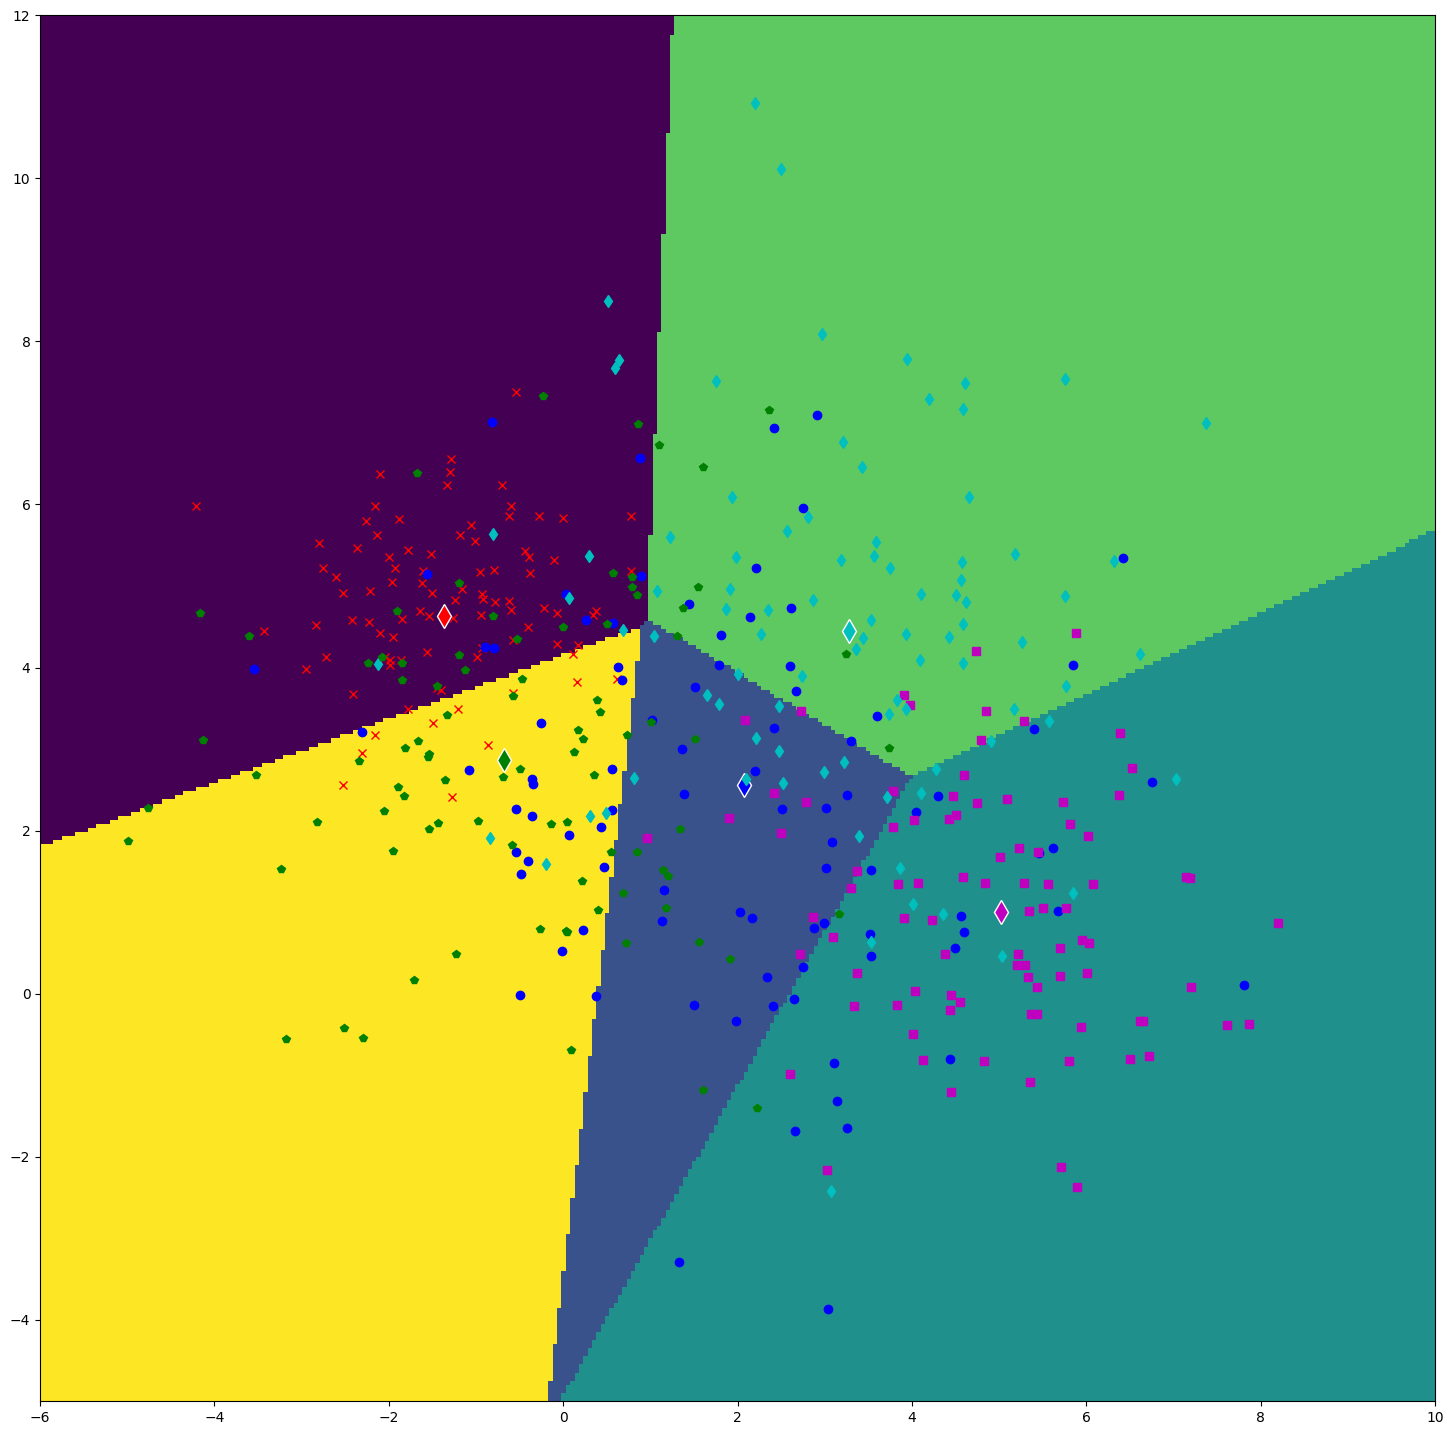

In [20]:
nmc_2features.plotDecisionBoundaries_2(training=X_test_2features_2, label_train=T_test, sample_mean=class_means_2features_2, fsize=(18,18))

### (c) vi] Report the classification accuracy on the Test set using only the 2 features.

In [21]:
CER_test_2features_2 = nmc_2features.calculateCER(T=T_test, Y_hat=Y_hat_test_2features_2, trainTestFlag="test", percentageFlag=True)

accuracy_test_2features_2 = nmc_2features.calculateAccuracy(T=T_test, Y_hat=Y_hat_test_2features_2, trainTestFlag="test", percentageFlag=True)


print(f"Accuracy for the Test set with only feature - {feature1} and feature - {feature2} is: {accuracy_test_2features_2}%")
print(f"Classification Error Rate for the Test set with only feature - {feature1} and feature - {feature2} is: {CER_test_2features_2}%")


Accuracy for the Test set with only feature - 3 and feature - 4 is: 60.44444444444444%
Classification Error Rate for the Test set with only feature - 3 and feature - 4 is: 39.55555555555556%


## (d) Repeat (b) using only the following features: X3 and X7.

### (d) i] Performing Classification using nmc_2features on Training data with only 2 features, X3 and X7.

In [22]:
nmc_2features = nearestMeansClassifier.NearestMeansClassifier()
feature1 = 3
feature2 = 7

In [23]:
X_train, n_train, T_train = nmc_2features.generateData(data=train_data)

X_train_2features_3 = nmc_2features.generateDataWith2Features(feature1=feature1, feature2=feature2, X=X_train, n=n_train, printFlag=True)

class_means_2features_3 = nmc_2features.calculateClassMeans(X=X_train_2features_3, redFlag=True)
print("---------------------------------------------------")
print(f"  Shape of sample_means: {class_means_2features_3.shape}")
print(f"  Sample Means: ")
print(class_means_2features_3)
print("---------------------------------------------------")

Y_hat_train_2features_3 = nmc_2features.classify(X=X_train_2features_3, sample_means=class_means_2features_3)

---------------------------------------------------
  Shape of Input Data: (1050, 8)
  Number of Data Points: 1050
  Number of Input Features: 7
  Number of Target Classes: 5
---------------------------------------------------
---------------------------------------------------
  After retaining only 2 features [3 and 7]: 
  Shape of X_2_features: (1050, 2)
  Number of Data Points: 1050
  Number of Input Features: 2
  Number of Target Classes: 5
---------------------------------------------------
---------------------------------------------------
  Shape of sample_means: (5, 2)
  Sample Means: 
[[-1.37040891 -0.48377135]
 [ 2.07045979 -1.5393723 ]
 [ 5.01696957  0.19203977]
 [ 3.28154766  3.26751149]
 [-0.67844556  1.24928872]]
---------------------------------------------------


### (d) ii] Plotting Decision Boundaries for the X_train_2features_3 (X3 and X7) in 2D Space.

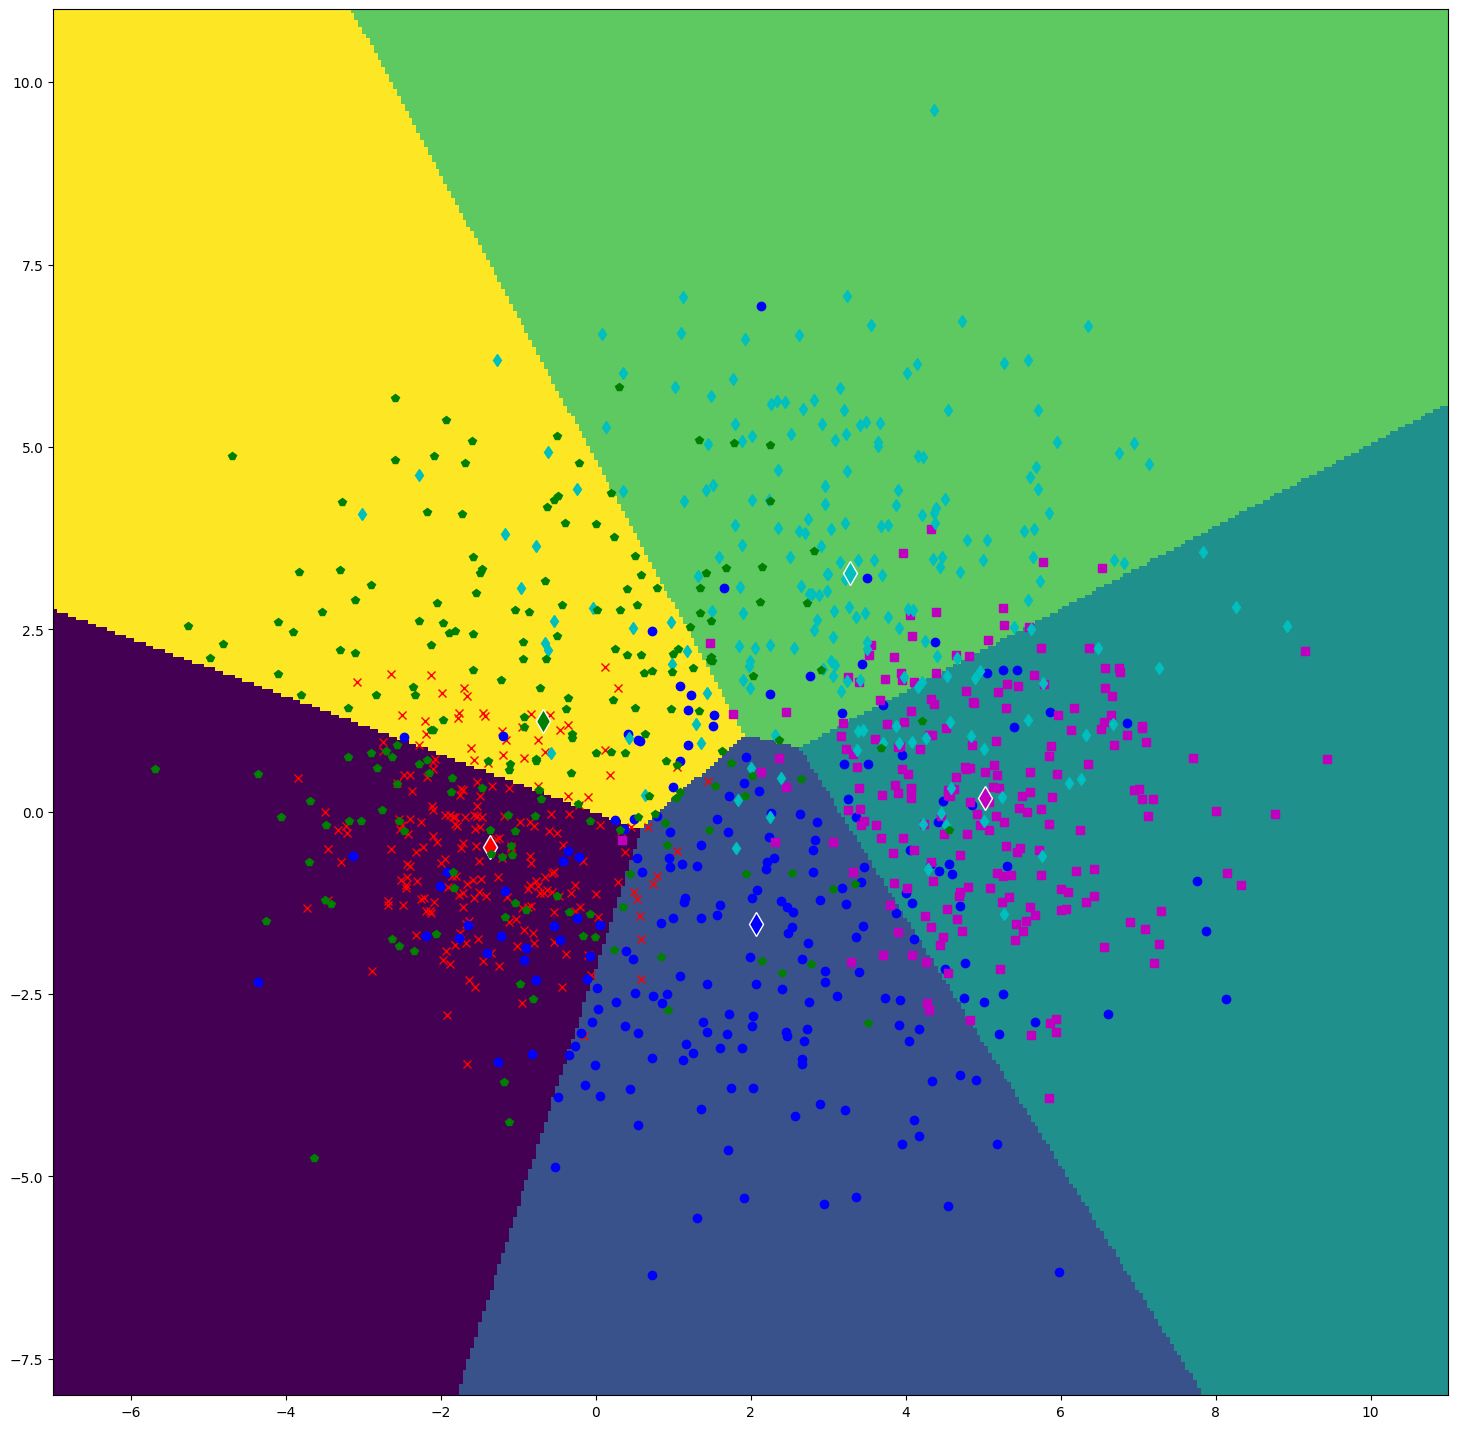

In [24]:
nmc_2features.plotDecisionBoundaries_2(training=X_train_2features_3, label_train=T_train, sample_mean=class_means_2features_3, fsize=(18,18))

### (d) iii] Report the classification accuracy on the Training set using only the 2 features X3 and X7

In [25]:
CER_train_2features_3 = nmc_2features.calculateCER(T=T_train, Y_hat=Y_hat_train_2features_3, trainTestFlag="train", percentageFlag=True)

accuracy_train_2features_3 = nmc_2features.calculateAccuracy(T=T_train, Y_hat=Y_hat_train_2features_3, trainTestFlag="train", percentageFlag=True)


print(f"Accuracy for the Training set with only feature - {feature1} and feature - {feature2} is: {accuracy_train_2features_3}%")
print(f"Classification Error Rate for the Training set with only feature - {feature1} and feature - {feature2} is: {CER_train_2features_3}%")

Accuracy for the Training set with only feature - 3 and feature - 7 is: 67.61904761904762%
Classification Error Rate for the Training set with only feature - 3 and feature - 7 is: 32.38095238095238%


### (d) iv] Performing Classification using nmc_2features on Test data with only 2 features, X3 and X7.

In [26]:
X_test, n_test, T_test = nmc_2features.transformTestData(test_data=test_data)

X_test_2features_3 = nmc_2features.generateDataWith2Features(feature1=feature1, feature2=feature2, X=X_test, n=n_test, printFlag=True)

Y_hat_test_2features_3 = nmc_2features.classify(X=X_test_2features_3, sample_means=class_means_2features_3)

---------------------------------------------------
  After retaining only 2 features [3 and 7]: 
  Shape of X_2_features: (450, 2)
  Number of Data Points: 450
  Number of Input Features: 2
  Number of Target Classes: 5
---------------------------------------------------


### (d) v] Plotting Decision Boundaries for the X_test_2features_3 (X3 and X7) in 2D Space.

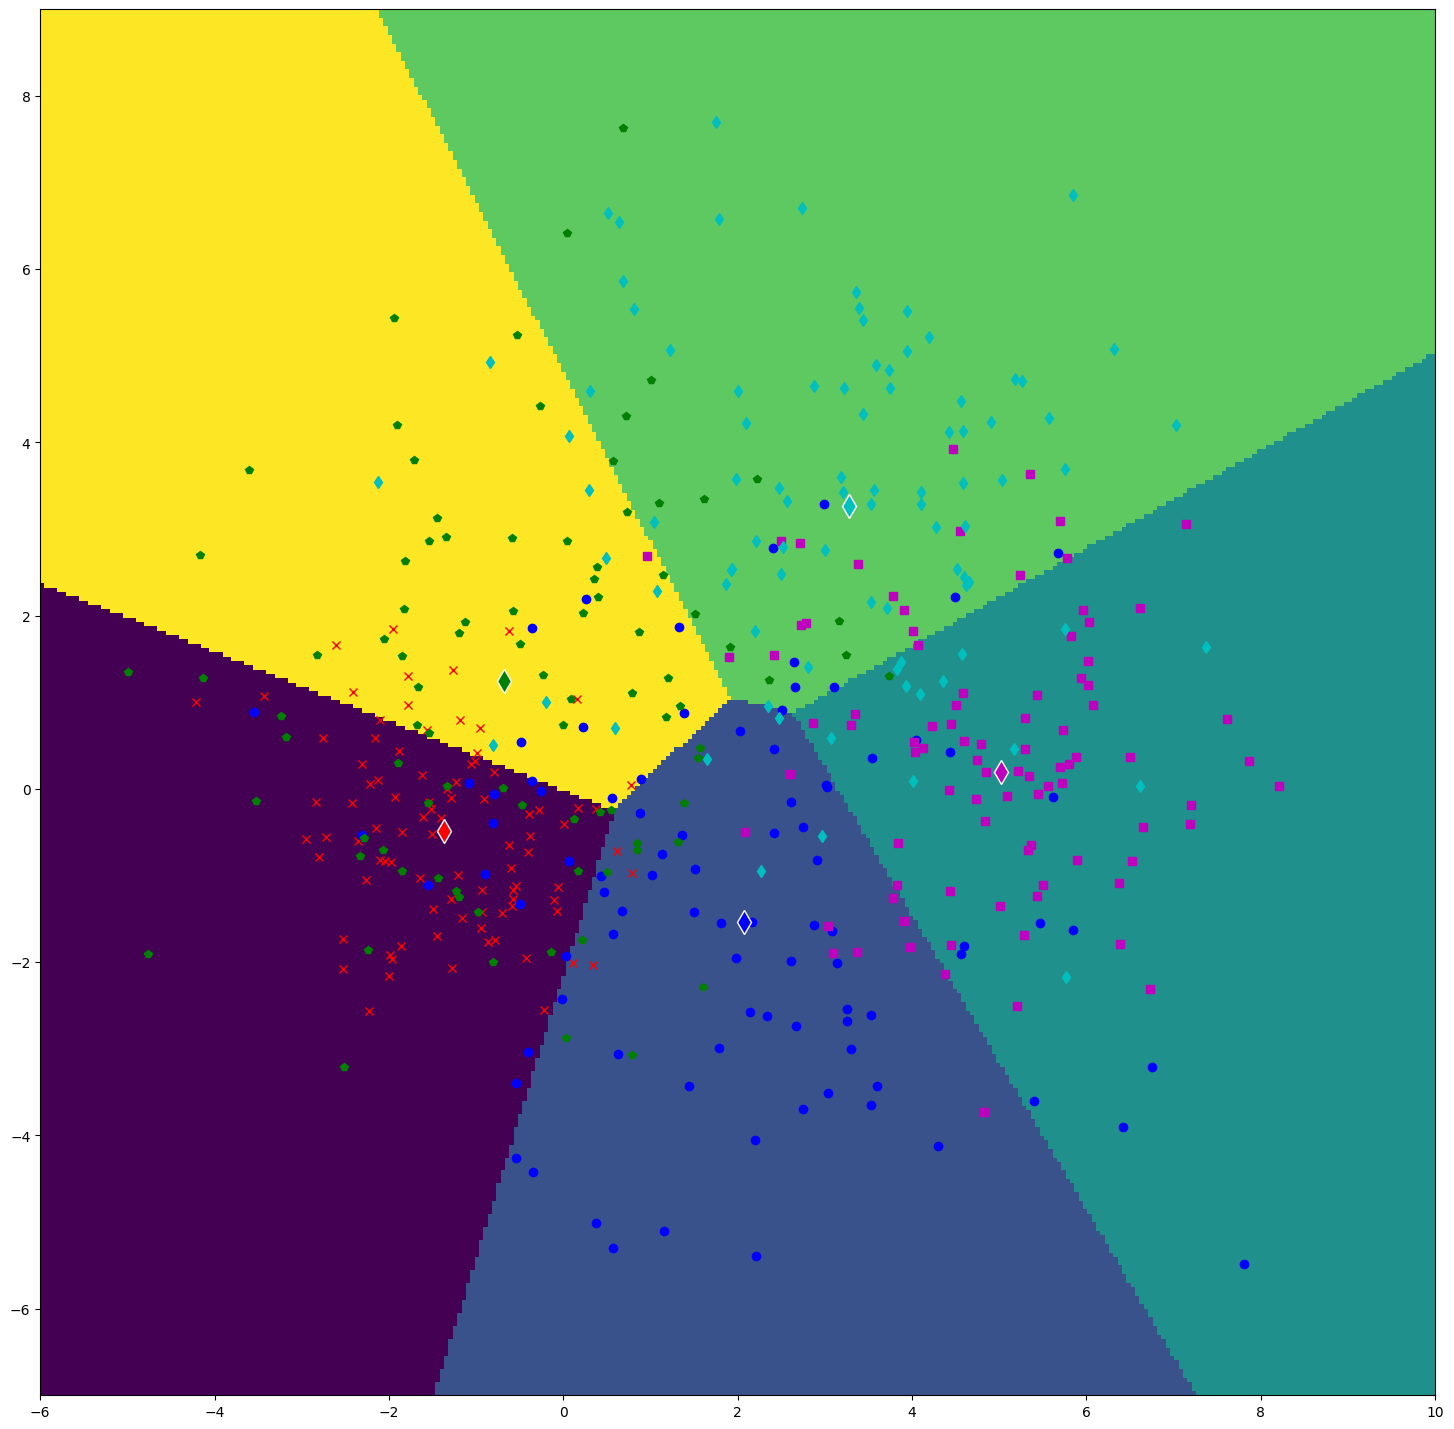

In [27]:
nmc_2features.plotDecisionBoundaries_2(training=X_test_2features_3, label_train=T_test, sample_mean=class_means_2features_3, fsize=(18,18))

### (d) vi] Report the classification accuracy on the Test set using only the 2 features X3 and X7.


In [28]:
CER_test_2features_3 = nmc_2features.calculateCER(T=T_test, Y_hat=Y_hat_test_2features_3, trainTestFlag="test", percentageFlag=True)

accuracy_test_2features_3 = nmc_2features.calculateAccuracy(T=T_test, Y_hat=Y_hat_test_2features_3, trainTestFlag="test", percentageFlag=True)


print(f"Accuracy for the Test set with only feature - {feature1} and feature - {feature2} is: {accuracy_test_2features_3}%")
print(f"Classification Error Rate for the Test set with only feature - {feature1} and feature - {feature2} is: {CER_test_2features_3}%")

Accuracy for the Test set with only feature - 3 and feature - 7 is: 63.77777777777778%
Classification Error Rate for the Test set with only feature - 3 and feature - 7 is: 36.22222222222222%


## (e) Of (b), (c), (d): which gives the best training accuracy? the best test accuracy?

### (e) i] Of (b), (c), (d): which gives the best training accuracy? 
### <strong> <em> Answer : (d) </strong> </em>

### (e) ii] Of (b), (c), (d): which gives the best Test accuracy? 
### <strong> <em> Answer : (d) </strong> </em>

## (f) In the plots of (b), (c), (d): Do you see any indeterminate regions? Are all the decision regions convex?